In [17]:
import findspark
findspark.init()

In [18]:
import pyspark
from pyspark import SparkConf
from pyspark.sql import SparkSession
#Create new spark session
spark = SparkSession.builder \
    .config('spark.driver.memory','16g') \
    .appName('CIFAR10 image classification') \
    .getOrCreate()

In [19]:
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=CIFAR10 image classification>

In [20]:
import matplotlib.pyplot as plt

In [21]:
#Import CIFAR10 dataset
from keras.datasets import cifar10
#  Split data set into training and test dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train shape: (50000, 32, 32, 3)


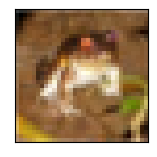

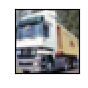

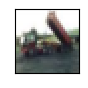

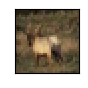

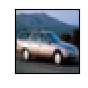

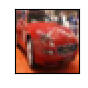

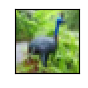

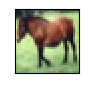

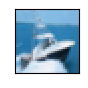

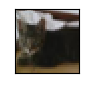

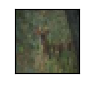

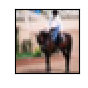

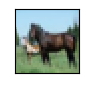

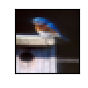

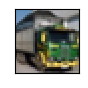

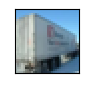

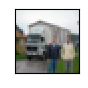

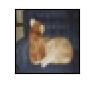

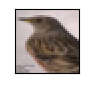

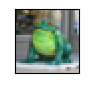

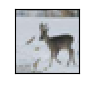

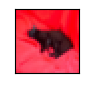

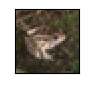

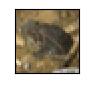

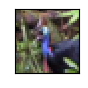

In [22]:
#Display the dimension and the sample images
print('x_train shape:', x_train.shape)
# select features into variable 'class_name'
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.show()

In [23]:
#Convert images using one hot encoding
from keras.utils import np_utils
import keras
y_train_one_hot = np_utils.to_categorical(y_train, 10)
y_test_one_hot = np_utils.to_categorical(y_test, 10)
print('The one hot label is:', y_train_one_hot[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [24]:
#Convert the images and display as an array
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [25]:
#Create the convolutional neural network model and display the model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

2023-01-20 19:16:15.629435: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-20 19:16:15.630428: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-20 19:16:15.630489: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (instance-5.us-east1-b.c.deloitte-team1.internal): /proc/driver/nvidia/version does not exist
2023-01-20 19:16:15.633555: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [26]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=2, 
           validation_split=0.2)

Epoch 1/2
1250/1250 [==============================] - 162s 129ms/step - loss: 1.5927 - accuracy: 0.4133 - val_loss: 1.1935 - val_accuracy: 0.5620
Epoch 2/2
1250/1250 [==============================] - 198s 159ms/step - loss: 1.1664 - accuracy: 0.5867 - val_loss: 0.9930 - val_accuracy: 0.6492


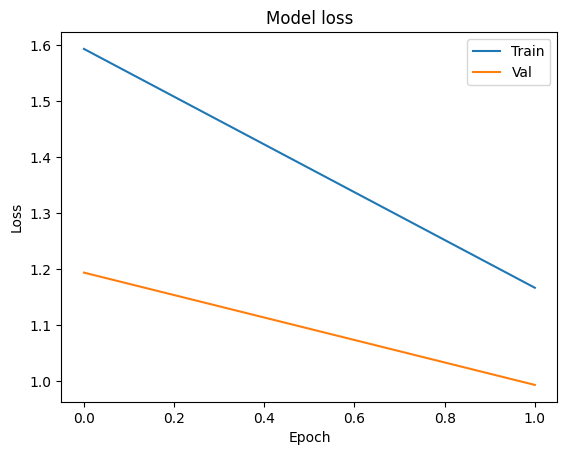

In [28]:
#Plot the model loss 
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

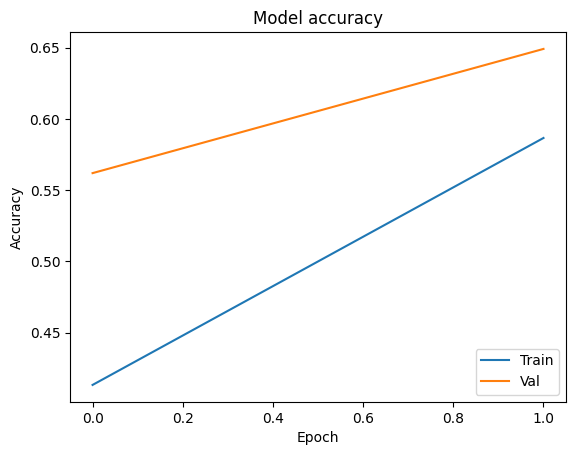

In [29]:
#Plot Model accuracy 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [30]:
#Evaluate the accuracy of the model
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 10s 32ms/step - loss: 1.0015 - accuracy: 0.6479


0.6478999853134155

In [31]:
sc.stop

<bound method SparkContext.stop of <SparkContext master=local[*] appName=CIFAR10 image classification>>